In [47]:
## Naive Bayes ##

# Team: Psychic-Pandas Anjana Eldo (SJSU ID : 012488983), Anjana Kamath Miyar (SJSU ID: 011526762), Mudrita Chaturvedi (SJSU ID: 012418094),Vidya Coimbatore Nand Kumar (SJSU ID: 010816832) #

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
results = pd.read_csv('indeed-results.csv')
results.head()

,location,title,company,salary
0,"Charlotte, NC",Sr. Data Scientist,ACT-Consulting,$102 an hour
1,"San Mateo, CA",Jr. Data Scientist,Harnham,"$130,000 a year"
2,"Minneapolis, MN 55439",Sr. Data Scientist,RED SKY Consulting,"$120,000 a year"
3,"Manhattan, NY",Jr. Data Scientist,DEPARTMENT OF TRANSPORTATION,"$60,189 - $83,440 a year"
4,"New York, NY",Jr. Data Scientist,"Envisagenics, Inc.","$65,000 - $110,000 a year"


In [50]:
results.shape

(174, 4)

In [51]:
# data preprocessing
salaries_sal = results[results.salary.notnull()]
salaries = salaries_sal[salaries_sal.company.notnull()]

salaries.shape

(174, 4)

In [52]:
salaries = salaries[(~salaries.salary.str.contains('an hour')) & (~salaries.salary.str.contains('a month'))
                   & (~salaries.salary.str.contains('a week')) & (~salaries.salary.str.contains('a day'))]

In [53]:
salaries.salary = salaries.salary.str.replace('a year', '').str.replace(',', '').str.replace('$', '')
salaries.shape

(156, 4)

In [54]:
for i in salaries.salary:
    if len(i.split('-')) != 1 and len(i.split('-')) != 2:
        print(i)

In [55]:
new_salaries = []
for i in salaries.salary:
    a = i.split('-')
    if len(a) == 2:
        new_salaries.append(np.mean([float(b) for b in a]))
    else:
        new_salaries.append(float(a[0]))

In [56]:
new_salaries[0:5]

[130000.0, 120000.0, 71814.5, 87500.0, 220000.0]

In [57]:
salaries.salary = new_salaries
salaries.head()

,location,title,company,salary
1,"San Mateo, CA",Jr. Data Scientist,Harnham,130000.0
2,"Minneapolis, MN 55439",Sr. Data Scientist,RED SKY Consulting,120000.0
3,"Manhattan, NY",Jr. Data Scientist,DEPARTMENT OF TRANSPORTATION,71814.5
4,"New York, NY",Jr. Data Scientist,"Envisagenics, Inc.",87500.0
5,"New York, NY",Chief Data Scientist,Harnham,220000.0


In [58]:
salaries.shape

(156, 4)

In [59]:
#Display null columns

null_columns=salaries.columns[salaries.isnull().any()]
print(salaries[salaries.isnull().any(axis=1)][null_columns].head())

Empty DataFrame
Columns: []
Index: []


In [60]:
#Find the median salary
median_salary = np.median(salaries.salary)
median_salary

141250.0

In [61]:
salaries['high_salary'] = [1 if i > median_salary else 0 for i in salaries.salary]

In [62]:
#Preprocessing for vectorization

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split

In [63]:
salaries['title'] = salaries['title'].apply(lambda x: x.lower())
salaries['title'] = salaries['title'].str.replace('[^\w\s]',' ')
salaries['title'].head(10)

1       jr  data scientist
2       sr  data scientist
3       jr  data scientist
4       jr  data scientist
5     chief data scientist
6           data scientist
7           data scientist
8           data scientist
9           data scientist
10          data scientist
Name: title, dtype: object

In [64]:
import re
states = ['IA', 'KS', 'UT', 'VA', 'NC', 'NE', 'SD', 'AL', 'ID', 'FM', 'DE', 'AK', 'CT', 'PR', 'NM', 'MS', 'PW', 'CO', 'NJ', 'FL', 'MN', 'VI', 'NV', 'AZ', 'WI', 'ND', 'PA', 'OK', 'KY', 'RI', 'NH', 'MO', 'ME', 'VT', 'GA', 'GU', 'AS', 'NY', 'CA', 'HI', 'IL', 'TN', 'MA', 'OH', 'MD', 'MI', 'WY', 'WA', 'OR', 'MH', 'SC', 'IN', 'LA', 'MP', 'DC', 'MT', 'AR', 'WV', 'TX']
regex = re.compile(r'\b(' + '|'.join(states) + r')\b')
salaries['location'] = salaries['location'].str.replace(',', '').str.extract(regex)

In [65]:
salaries['location'].head(10)

1     CA
2     MN
3     NY
4     NY
5     NY
6     MA
7     CA
8     NY
9     NY
10    NY
Name: location, dtype: object

In [66]:
#salaries.head()

In [67]:
salaries.location = pd.Categorical(salaries.location)
salaries['loc_code'] = salaries.location.cat.codes
salaries

,location,title,company,salary,high_salary,loc_code
1,CA,jr data scientist,Harnham,130000.0,0,1
2,MN,sr data scientist,RED SKY Consulting,120000.0,0,9
3,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,71814.5,0,12
4,NY,jr data scientist,"Envisagenics, Inc.",87500.0,0,12
5,NY,chief data scientist,Harnham,220000.0,1,12
6,MA,data scientist,AA Search,160000.0,1,8
7,CA,data scientist,MACP Los Angeles,185000.0,1,1
8,NY,data scientist,indify,130000.0,0,12
9,NY,data scientist,WorldCover,90000.0,0,12
10,NY,data scientist,Scienaptic Systems Inc,100000.0,0,12


In [68]:
salaries.title = pd.Categorical(salaries.title)
salaries['title_code'] = salaries.title.cat.codes
salaries.company = pd.Categorical(salaries.company)
salaries['company_code'] = salaries.company.cat.codes
salaries

,location,title,company,salary,high_salary,loc_code,title_code,company_code
1,CA,jr data scientist,Harnham,130000.0,0,1,2,22
2,MN,sr data scientist,RED SKY Consulting,120000.0,0,9,4,39
3,NY,jr data scientist,DEPARTMENT OF TRANSPORTATION,71814.5,0,12,2,12
4,NY,jr data scientist,"Envisagenics, Inc.",87500.0,0,12,2,17
5,NY,chief data scientist,Harnham,220000.0,1,12,0,22
6,MA,data scientist,AA Search,160000.0,1,8,1,1
7,CA,data scientist,MACP Los Angeles,185000.0,1,1,1,32
8,NY,data scientist,indify,130000.0,0,12,1,56
9,NY,data scientist,WorldCover,90000.0,0,12,1,54
10,NY,data scientist,Scienaptic Systems Inc,100000.0,0,12,1,42


In [69]:
X = salaries.iloc[:, [5,6,7]].values
X

array([[ 1,  2, 22],
       [ 9,  4, 39],
       [12,  2, 12],
       [12,  2, 17],
       [12,  0, 22],
       [ 8,  1,  1],
       [ 1,  1, 32],
       [12,  1, 56],
       [12,  1, 54],
       [12,  1, 42],
       [12,  1, 16],
       [12,  1, 38],
       [ 1,  1, 29],
       [ 1,  1, 26],
       [ 1,  1, 27],
       [ 3,  1,  6],
       [ 3,  1, 52],
       [ 3,  1, 20],
       [ 8,  1, 13],
       [15,  1,  8],
       [15,  1, 52],
       [15,  1, 27],
       [16,  1, 37],
       [18,  1, 34],
       [11,  1, 45],
       [13,  1, 22],
       [12,  1, 43],
       [ 7,  1, 25],
       [ 7,  1, 27],
       [ 7,  1, 23],
       [ 1,  1, 53],
       [ 8,  1, 10],
       [ 5,  1, 44],
       [12,  1, 35],
       [ 3,  1, 20],
       [15,  1,  7],
       [12,  1, 22],
       [ 8,  1, 48],
       [ 1,  1, 27],
       [ 6,  1, 22],
       [14,  1, 51],
       [12,  1, 22],
       [ 7,  1, 41],
       [ 6,  1,  3],
       [ 7,  1, 23],
       [ 1,  1, 31],
       [ 1,  1, 52],
       [ 1,  

In [70]:
Y = salaries.iloc[:, 4].values
Y

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0])

In [71]:
# Splitting the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)


In [72]:
# Feature Scaling

#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)
#X_train

# Principal component Analysis
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.89922633, 0.09586801])

## Naive Bayes Classification ##

** Naive bayes Classification is applied to dataset, by assuming location, title and company. **
** Location, title and company are considered independant features. **
** The probability of salary being above mean / below mean is calculated **

In [73]:
# Fitting classifier to training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB(priors=None)

In [74]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1])

In [75]:
Y_test

array([0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1])

In [76]:
# Compute the accuracy score
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(Y_test, y_pred)

0.71875

In [77]:
# Compute confusion matrix
confusion_matrix(Y_test, y_pred)

array([[12,  5],
       [ 4, 11]])

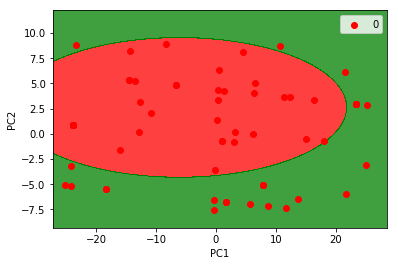

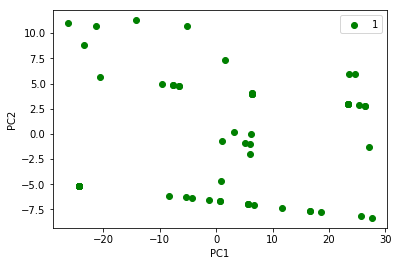

In [78]:
#Visualizing

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, Y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label =j)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()